## Thinkful Support Vector Machine Challenge
__July, 2018 - Christopher Sanchez__

Our goal in this project is to determine if we can improve the support vector machine regression model created by Thinkful. I will be using the data Thinkful selected from www.kaggle.com that can be found at this link:
<div class="alert alert-info">
https://www.kaggle.com/hugodarwood/epirecipes/version/2#
</div>

### The Data:
The data contains 681 columns and 20,052 rows representing various factors such as locations, ingredients, seasons and much more. Our goal is to clean up the data and eliminate the unecessary features. Our target number of featues is 30. The creator of the dataset described it as "Over 20k recipes listed by recipe rating, nutritional information and assigned category (sparse)."

### What knowledge can we gain from this data set?
   We are ultimately going to improve the score of the model, along the way we will determine the best way to do so, by attempting various preprocessing and feature selection methods. We will also determine whether there are any biases.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.svm import SVC, SVR
import operator

We have now imported all of the packages we are going to need in order to perform the analysis necessary to improve our r^2 score. We will be using Sklearns Random Forest Classifier to utilize it's effective feature selection function. We will also use sklearns preprocessing to scale our data appropriately. We will use cross validation score to determine how our data is fitting across various sample sets. We will also be using a support vector classifier to see if we can get a better score than the regression model. 

Let's start by importing the data and displaying the columns.

In [2]:
raw_data = pd.read_csv('epi_r.csv')
raw_data['output'] = raw_data['rating'] >= 4
raw_data.shape

(20052, 681)

That sure is a lot of features. Later on we will determine which features we will keep for our input variables. For now lets take a look at our output.

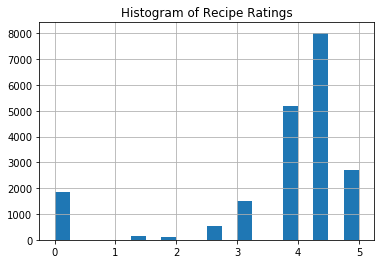

In [3]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

Our histogram is skewed heavy to the right. It is an interesting result, because a lot of times people are more eager to share the bad than the good. This looks like it is our first bias. A majority of the ratings are above average with most of them being between 4 and 5. There really is no way to compare it to the lower ratings accurately, because of the lack of data.

In [4]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

There is quite a bit of missing data. 

Now lets take a look at Thinkfuls model.

In [5]:
svr = SVR()
Reg_X = raw_data.drop(['rating', 'output', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Reg_Y = raw_data.rating
svr.fit(Reg_X,Reg_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

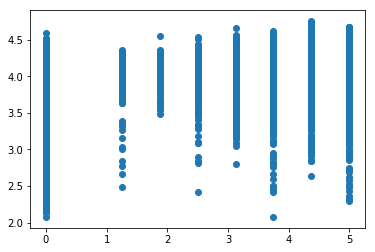

In [6]:
plt.scatter(Reg_Y, svr.predict(Reg_X));

In [7]:
svr.score(Reg_X, Reg_Y)

0.03856570651298896

In [8]:
cross_val_score(svr, Reg_X, Reg_Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

The model is fitting horribly with under a 4% accuracy rate. Let's see what we can do to correct it.

We will convert the output variable to a categorical variable, then we will split the data using train test split, we will then fit the data to a random forest classifier so we can determine the 30 most important features.

In [1]:
# convert previous output rating to a categorical variable that is greater than or equal to 4.
X = Reg_X
Y = raw_data['output']

# split our data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
features = []
# Print the name and gini importance of each feature
for feature in zip(X_train, clf.feature_importances_):
    features.append(feature)
    

NameError: name 'Reg_X' is not defined

In [10]:
# sort features and print out the 30 most important.
features.sort(key=operator.itemgetter(1))
features[-29:]

[('citrus', 0.006051743051299342),
 ('tree nut free', 0.006074728019653666),
 ('lemon', 0.0060784409405629436),
 ('cheese', 0.0061379126051069105),
 ('ginger', 0.006152582074444329),
 ('dinner', 0.006278570248008463),
 ('fruit', 0.006614714203159983),
 ('side', 0.006938585874050658),
 ('dairy', 0.0072559018101553165),
 ('healthy', 0.007489302688741226),
 ('garlic', 0.007528670933004956),
 ('milk/cream', 0.007749536365297348),
 ('vegetable', 0.0077621954220819306),
 ('spring', 0.007792932222565165),
 ('egg', 0.007819220240490313),
 ('kid-friendly', 0.00795472152553488),
 ('wheat/gluten-free', 0.008076858561971682),
 ('tomato', 0.008109847961694868),
 ('sauté', 0.008135189637074878),
 ('herb', 0.008167735698891898),
 ('onion', 0.008723824627275644),
 ('vegetarian', 0.008889116288866704),
 ('fall', 0.009016979634675883),
 ('gourmet', 0.010061629234778418),
 ('bake', 0.0102804645506507),
 ('winter', 0.01046084828411415),
 ('summer', 0.010677370593662727),
 ('bon appétit', 0.012245138270535

Our feature selection model worked perfectly and we now have our 30 most important features. Lets go ahead and turn them into our input, scale the data, and then fit it to a support vector classifier. Then we will test our accuracy to see if we have improved the model.

In [11]:
# creating the new input dataframe and scaling the data
X = raw_data[['quick & easy', 'bon appétit', 'summer', 'winter', 'bake', 'gourmet', 'fall', 'vegetarian', 'onion', 'herb', 'sauté', 'tomato', 'wheat/gluten-free', 'kid-friendly', 'egg', 'spring', 'vegetable', 'milk/cream', 'garlic', 'healthy', 'dairy', 'side', 'fruit', 'dinner', 'ginger', 'cheese', 'lemon', 'tree nut free', 'citrus']]
X = pd.DataFrame(preprocessing.scale(X))

# fitting the data to the model
svc = SVC()
svc.fit(X,Y)

# testing the R score
print('R score:')
print(svc.score(X, Y))
print('Cross validation R score:')
print(cross_val_score(svc, X, Y, cv=5))

R score:
0.6613305405944544
Cross validation R score:
[0.5754176  0.5632012  0.57865869 0.57755611 0.57944625]


Our accuracy has went up tremendously to an average of nearly 58% across 5 samples. We improved the score over 50% points by cleaning up the data slightly and changing the model from from regression to classification.

## Conclusion and Discussion
In the beginning our model wasn't working very well, a regression model wasn't the best choice for this data set. There is a lot of bias in the data, like the fact that theres not very many low ratings. We used a feature selection algorithm to determine the most important features, and then edited our input variable in order to better fit data. After fitting the new data to the classifier model we greatly improved the score and I would categorize this experiment as a success. We did a lot with a little.